Part B

Step 1: Data Collection

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Dropout
from sklearn.model_selection import train_test_split


In [7]:

# Load the dataset
movie_reviews = pd.read_csv("imdb.csv")

# Check for null entries
print("Is the dataset having any null entries?", movie_reviews.isnull().values.any())

# Print dataset dimensions
print("Dataset dimensions:", movie_reviews.shape)

# Print first 5 entries
print(movie_reviews.head())

# Print number of positive and negative reviews
print("Number of positive and negative reviews:\n", movie_reviews['sentiment'].value_counts())

Is the dataset having any null entries? False
Dataset dimensions: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Number of positive and negative reviews:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [8]:
# Step 1: Import Libraries
import pandas as pd

# Step 2: Load the Dataset
df = pd.read_csv('imdb.csv')


for column in df.select_dtypes(include=['bool']):
    df[column] = df[column].astype(int)


df.head(100)



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,positive
96,My guess would be this was originally going to...,negative
97,"Well, I like to watch bad horror B-Movies, cau...",negative
98,"This IS the worst movie I have ever seen, as w...",negative


Visualization

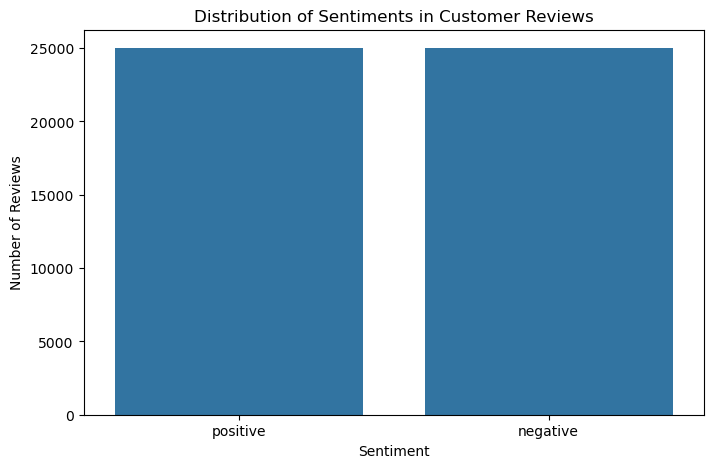

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of sentiments
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments in Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [10]:
import tensorflow as tf
print(tf.__version__)  # This should print the version of TensorFlow

2.18.0


Step 2: Data Preprocessing

In [11]:
df = pd.read_csv('imdb.csv')  # Adjust the path as necessary

# Display the first few rows
df.head()

# Data Preprocessing Function
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [ ]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Display the cleaned reviews
df[['review', 'cleaned_review']].head()

Visualization

In [ ]:
visualization_df = pd.DataFrame({
    'Original Text': sample_texts,
    'Preprocessed Text': preprocessed_texts
})

# Visualize the changes
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot original vs preprocessed text lengths
visualization_df['Original Length'] = visualization_df['Original Text'].apply(len)
visualization_df['Preprocessed Length'] = visualization_df['Preprocessed Text'].apply(len)

# Create a bar plot
visualization_df[['Original Length', 'Preprocessed Length']].plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Text Lengths Before and After Preprocessing')
plt.ylabel('Length of Text')
plt.xlabel('Sample Index')
plt.xticks(range(sample_size), range(1, sample_size + 1), rotation=0)
plt.legend(['Original Text', 'Preprocessed Text'])
plt.tight_layout()
plt.show()

# Display the original and preprocessed texts
print(visualization_df)

Step 3: Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

# Fit and transform the cleaned reviews
X = tfidf_vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']  # Assuming sentiment is in a column named 'sentiment'

# Display the shape of the feature matrix
X.shape, y.shape

Visualization

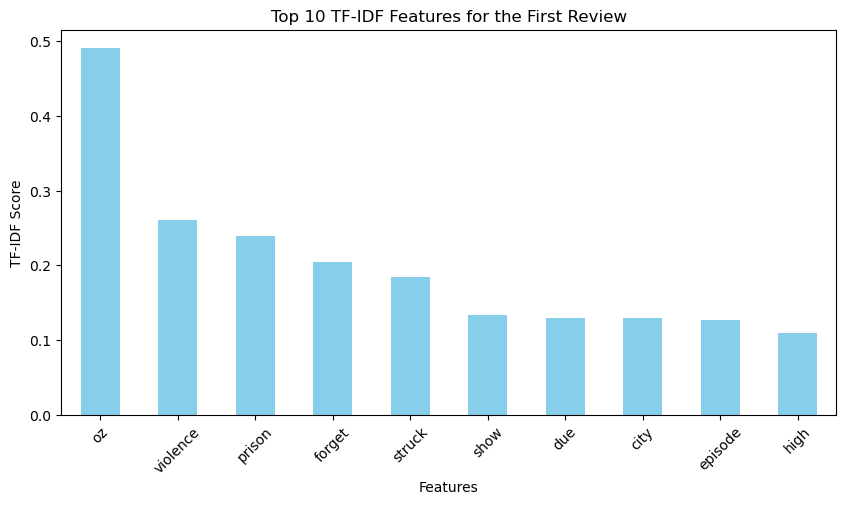

In [11]:
# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for the TF-IDF features
tfidf_df = pd.DataFrame(X, columns=feature_names)

# Visualizing the top 10 features for the first review
top_features = tfidf_df.iloc[0].nlargest(10)

plt.figure(figsize=(10, 5))
top_features.plot(kind='bar', color='skyblue')
plt.title('Top 10 TF-IDF Features for the First Review')
plt.xlabel('Features')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

Step 4: Model Selection and Training

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

NameError: name 'X' is not defined

Visualization

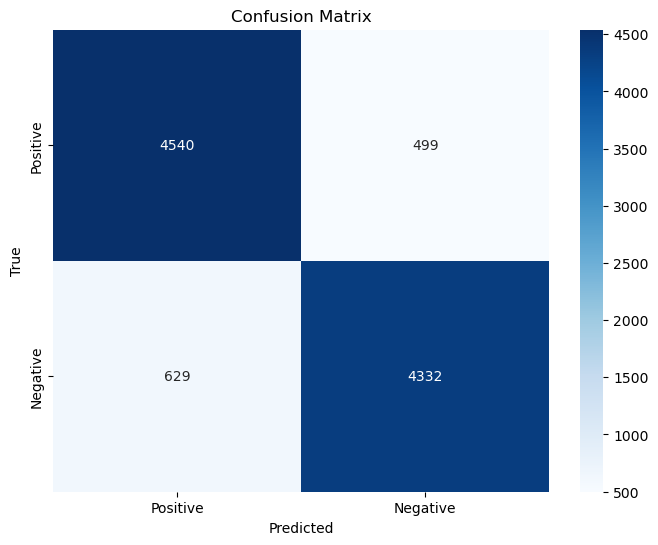

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Step 5: Evaluation

In [4]:
# Evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')  # Adjust pos_label as necessary
recall = recall_score(y_test, y_pred, pos_label='positive')  # Adjust pos_label as necessary

# Display evaluation metrics
accuracy, precision, recall

NameError: name 'y_test' is not defined

Visualization

In [ ]:
# Evaluation metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['lightblue', 'lightgreen', 'salmon'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.show()